<img src="notebook_header.png">

# **Proyecto Aplicado: Avance de la Vacunación contra el COVID-19 en Colombia**
---
Presentado por:
- Juan Diego Ocampo M. (Grupo 6)
- Edgar Fernando Vargas (Grupo 4)

### **Tabla de Contenidos**
---
1. [Metodología CRISP-MD (Parte 1): Entendimiento del Negocio] <br>
2. [Metodología CRISP-MD (Parte 2): Entendimiento de los Datos] <br>
    2.1. [Descargar e Importar Librerías] <br>
    2.2. [Importar Datasets] <br>
    2.3. [Procesamiento del Dataset sobre Vacunación Mundial] <br>
    2.4. [Procesamiento del Dataset sobre Datos Geoespaciales] <br>
    2.5. [Combinación de los Datasets] <br>
3. [Visualización de los Datos] <br>
    3.1. [Correlación entre las Variables] <br>
    3.2. [Distribución de los Esquemas de Vacunación] <br>
    3.3. [Esquemas de Inmunización por País] <br>
    3.4. [Total de Vacunas Aplicadas] <br>
    3.5. [Porcentaje de Población Vacunada (al menos una dósis)] <br>
    3.6. [Total de Vacunas Aplicadas (Semanal)] <br>
    3.7. [Total de Vacunas Diarias Aplicadas por País] <br>
4. [Conclusiones] <br>
5. [Video de la Presentación] <br>

## **1. Metodología CRISP-MD (Parte 1): Entendimiento del Negocio**
---
- La pandemia del COVID-19 ha tenido un impacto devastador a nivel mundial no solo en el ámbito de salud sino también en social y económico. Para el caso de Colombia basta con decir que la crisis ocasionada por el virus ha inducido un retroceso general en la economía de hasta 30 años, puesto que el PIB ha caído alrededor del 6.8% (algo que nunca antes había sucedido en el país) y además ha dejado a su paso más de 3.75 millones de personas en situación de desempleo (1).

- La principal esperanza para mitigar estos daños en el 2021 radica en el Plan Nacional de Vacunación (que ha iniciado el pasado 17 de febrero) con cual Colombia se convirtió en el décimo país de Latinoamérica en iniciar su programa de vacunación y con el que se espera inmunizar a 35,2 millones de colombianos a final de año y así lograr la reactivación de la actividad económica.

- El objetivo de este trabajo es visualizar la progresión y los resultados del Plan Nacional de Vacunación de Colombia comparado con otros países de Latinoamérica.


## **2. Metodología CRISP-MD (Parte 2): Entendimiento de los Datos**
---

Para el desarrollo de este proyecto utilizaremos varios datasets para realizar el procesamiento de datos y visualización sobre los mismos. El primero de estos contiene **datos sobre el progreso diario y acumulado de vacunación contra el COVID-19 en el mundo**, el cual se puede descargar hacienco clic [aquí](https://www.kaggle.com/gpreda/covid-world-vaccination-progress/download).

El dataset original puede encontrarse en [Kaggle] (https://www.kaggle.com/gpreda/covid-world-vaccination-progress) junto a su repositorio en [GitHub](https://github.com/owid). Este conjunto de datos contiene las siguientes variables: uede encontrar el *dataset* original en el portal Kaggle. Este conjunto de datos cuenta con las siguientes variables:

| **Variable** | **Descripción** |
| --- | --- |
|**Country**| País para el que se proporciona la información de vacunación. |
|**Country ISO Code**| Código ISO del país.|
|**Date**| Fecha del registro correspondiente (en algunos casos solo está disponible para los registros de vacunación diarios mientras que en otros casos únicamente para el registro acumulativo). |
|**Total number of vaccinations**| Número total de personas vacunadas en el país. |
|**Total number of people vaccinated**| Número total de personas que están inmunizadas (hay esquemas de inunización que requieren de más de una dosis por paciente, por lo que el número de vacunaciones puede ser mayor que el número de personas). |
|**Total number of people fully vaccinated**| Número de personas que recibieron el conjunto completo de inmunización de acuerdo con el esquema de inmunización.|
|**Daily vaccinations (raw)**| Número de personas vacunadas para esa fecha o país (para una determinada entrada de datos).|
|**Daily vaccinations**| Número de personas vacunadas en un dia en el país.|
|**Total vaccinations per hundred**| Relación (en porcentaje) entre el número de vacunaciones y la población total hasta la fecha en el país.|
|**Total number of people vaccinated per hundred**| Relación (en porcentaje) entre la población inmunizada y la población total hasta la fecha en el país.|
|**Total number of people fully vaccinated per hundred**| Relación (en porcentaje) entre la población totalmente inmunizada y la población total hasta la fecha en el país.|
|**Number of vaccinations per day**| Número de vacunaciones diarias en el país.|
|**Daily vaccinations per million**| Relación (en ppm) entre el número de vacunación y la población total para la fecha actual en el país.|
|**Vaccines**| Nombre del o de los proovedores de las vacunas para el país.|
|**Source name**| Fuente de la información (autoridad nacional, organización internacional, organización local, etc.).|
|**Source website**| Sitio web de la fuente de información.|


### 2.1 Descargar e Importar Librerías

In [1]:
# Descargar Librerías 
!pip install -r requirements.txt
print('Librerías instaladas con éxito!')        

Librerías instaladas con éxito!


In [2]:
# Importar Librerías
try:
    import numpy as np
    import pandas as pd
    import geopandas as gpd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import plotly
    import plotly.graph_objs as go 
    import plotly.express as px
    import json
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from urllib.request import urlopen
    from IPython.lib.display import YouTubeVideo
    print('Librerías cargadas con éxito!')    
    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    pd.options.plotting.backend = "plotly"
except RuntimeError as err:
    print("RuntimeError: {0}".format(err))


Librerías cargadas con éxito!


### 2.2 Importar Datasets

In [3]:
# Descomprimir archivo .zip con los Dataset
try:
    !unzip archive.zip
    print('Archivo .zip descomprimido con éxito!')
except RuntimeError as err:
    print("RuntimeError: {0}".format(err))

Archive:  archive.zip
  inflating: country_vaccinations.csv  
  inflating: __MACOSX/._country_vaccinations.csv  
  inflating: geo_dataset.geojson     
  inflating: __MACOSX/._geo_dataset.geojson  
Archivo .zip descomprimido con éxito!


In [4]:
# Cargar Dataset de Vacunación Mundial
try:
    vaccination_df = pd.read_csv('country_vaccinations.csv', parse_dates = ['date'])
    print('Dataset importado con éxito!')
    print('Shape: {} rows x {} columns.'.format(vaccination_df.shape[0], vaccination_df.shape[1]))
    print('Contiene datos de {} países diferentes.'.format(vaccination_df['country'].nunique()))
except RuntimeError as err:
    print("RuntimeError: {0}".format(err))

# Visualizar información del Dataset
print(vaccination_df.info())

# Visualizar 5 filas del Dataset
vaccination_df.sample(5)

Dataset importado con éxito!
Shape: 7897 rows x 15 columns.
Contiene datos de 151 países diferentes.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7897 entries, 0 to 7896
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              7897 non-null   object        
 1   iso_code                             7897 non-null   object        
 2   date                                 7897 non-null   datetime64[ns]
 3   total_vaccinations                   4889 non-null   float64       
 4   people_vaccinated                    4338 non-null   float64       
 5   people_fully_vaccinated              2961 non-null   float64       
 6   daily_vaccinations_raw               4112 non-null   float64       
 7   daily_vaccinations                   7709 non-null   float64       
 8   total_vaccinations_per_hundred       4889 non-null   floa

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2897,Greece,GRC,2021-03-03,991409.0,643218.0,348191.0,34270.0,28152.0,9.51,6.17,3.34,2701.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://www.data.gov.gr/datasets/mdg_emvolio/
4944,Montserrat,MSR,2021-03-08,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,3801.0,Oxford/AstraZeneca,Government of Montserrat,https://www.facebook.com/GIUMontserrat/photos/...
7842,Wales,OWID_WLS,2021-03-02,1066798.0,942017.0,124781.0,21597.0,18430.0,33.84,29.88,3.96,5845.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
5580,Panama,PAN,2021-03-14,253800.0,NaN,NaN,1487.0,6484.0,5.88,NaN,NaN,1503.0,Pfizer/BioNTech,Ministry of Health,https://twitter.com/EstrellaOnline/status/1373...
2422,Faeroe Islands,FRO,2021-02-03,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN,1699.0,"Moderna, Pfizer/BioNTech",Government of the Faeroe Islands,https://corona.fo/api


In [5]:
# Cargar Datos Geoespaciales para Visualización
try:
    map_df = gpd.read_file('https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_10m_admin_0_countries.geojson')
    map_df = map_df[map_df['SOVEREIGNT'] == map_df['ADMIN']][['ADMIN', 'geometry']]
    map_df.columns = ['country', 'geometry']
    print('Dataset importado con éxito!')
    print('Shape: {} rows x {} columns.'.format(map_df.shape[0], map_df.shape[1]))
    print('Contiene datos de {} países diferentes.'.format(map_df['country'].nunique()))
except RuntimeError as err:
    print("RuntimeError: {0}".format(err))

# Visualizar información del Dataset
print(map_df.info())

# Visualizar 5 filas del Dataset
map_df.sample(5)

Dataset importado con éxito!
Shape: 205 rows x 2 columns.
Contiene datos de 205 países diferentes.
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 205 entries, 1 to 254
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   country   205 non-null    object  
 1   geometry  205 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.8+ KB
None


,country,geometry
25,The Bahamas,"MULTIPOLYGON (((-73.03393 21.15673, -73.09759 ..."
63,Dominica,"POLYGON ((-61.36286 15.20181, -61.37409 15.204..."
26,Bosnia and Herzegovina,"POLYGON ((16.94153 45.24122, 16.94732 45.23569..."
113,Jamaica,"POLYGON ((-76.26374 18.01236, -76.25678 17.996..."
35,Brunei,"MULTIPOLYGON (((115.13453 4.90884, 115.14584 4..."


### 2.3 Procesamiento del Dataset sobre Vacunación Mundial

A continuación se crean subconjuntos de datos para Latinoamérica y para Colombia con base en el Dataset *vaccination_df*. <br>

** Nota **: No todos los países se encuentran actualizados hasta el mismo día en el conjunto de datos. Por lo tanto, debemos seleccionar la última fecha que sea común en todos los países.

In [6]:
 # Constantes para el filtrado del Dataset 
latam_countries =  pd.Series(['Argentina','Bolivia','Brazil','Chile','Colombia','Costa Rica','Cuba','Ecuador','El Salvador','Guatemala','Honduras','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Dominican Republic','Uruguay','Venezuela'])
latam_countries_total =  pd.Series(['Argentina','Bolivia','Brazil','Chile','Colombia','Costa Rica','Cuba','Ecuador','El Salvador','Guatemala','Honduras','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Dominican Republic','Uruguay','Venezuela'])

In [7]:
# Crear Dataset para Latinoamérica
vaccination_df_latam = vaccination_df[vaccination_df['country'].isin(latam_countries)]
vaccination_df_latam_copy = vaccination_df_latam.dropna()
vaccination_df_latam = vaccination_df_latam.groupby(['country', 'iso_code', 'vaccines']).last().reset_index()
print('Subconjuntos de datos creado!')
print('Shape: {} rows x {} columns.'.format(vaccination_df_latam.shape[0], vaccination_df_latam.shape[1]))
print('Contiene datos de {} países diferentes.'.format(vaccination_df_latam['country'].nunique()))

# Visualizar información del Dataset
print(vaccination_df_latam.info())

# Visualizar el Dataset para Latinoamérica 
vaccination_df_latam

Subconjuntos de datos creado!
Shape: 17 rows x 15 columns.
Contiene datos de 17 países diferentes.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              17 non-null     object        
 1   iso_code                             17 non-null     object        
 2   vaccines                             17 non-null     object        
 3   date                                 17 non-null     datetime64[ns]
 4   total_vaccinations                   17 non-null     float64       
 5   people_vaccinated                    16 non-null     float64       
 6   people_fully_vaccinated              9 non-null      float64       
 7   daily_vaccinations_raw               15 non-null     float64       
 8   daily_vaccinations                   17 non-null     float64   

,country,iso_code,vaccines,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,source_website
0,Argentina,ARG,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",2021-03-23,3240731.0,2618750.0,621981.0,98287.0,99910.0,7.17,5.79,1.38,2211.0,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Bolivia,BOL,Sputnik V,2021-03-22,180187.0,151952.0,28235.0,11710.0,5482.0,1.54,1.30,0.24,470.0,Ministry of Health,https://twitter.com/SaludDeportesBo/status/137...
2,Brazil,BRA,"Oxford/AstraZeneca, Sinovac",2021-03-23,15209201.0,11559487.0,3649714.0,1092641.0,417182.0,7.16,5.44,1.72,1963.0,Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...
3,Chile,CHL,"Pfizer/BioNTech, Sinovac",2021-03-23,8968634.0,5889862.0,3078772.0,224219.0,217127.0,46.92,30.81,16.11,11358.0,Department of Statistics and Health Information,https://www.gob.cl/yomevacuno/
4,Colombia,COL,"Pfizer/BioNTech, Sinovac",2021-03-22,1238259.0,1177935.0,60324.0,23251.0,46328.0,2.43,2.31,0.12,910.0,Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
5,Costa Rica,CRI,Pfizer/BioNTech,2021-03-22,312425.0,206198.0,106227.0,NaN,9192.0,6.13,4.05,2.09,1804.0,Costa Rican Social Security Fund,https://www.ccss.sa.cr/web/coronavirus/vacunacion
6,Dominican Republic,DOM,"Oxford/AstraZeneca, Sinovac",2021-03-23,800000.0,800000.0,NaN,58915.0,15625.0,7.37,7.37,NaN,1440.0,Ministry of Public Health,https://twitter.com/SaludPublicaRD/status/1374...
7,Ecuador,ECU,Pfizer/BioNTech,2021-03-21,178970.0,140765.0,38205.0,16183.0,5528.0,1.01,0.80,0.22,313.0,Government of Ecuador via Ecuacovid,https://github.com/andrab/ecuacovid
8,El Salvador,SLV,Oxford/AstraZeneca,2021-03-21,49000.0,49000.0,NaN,5512.0,3429.0,0.76,0.76,NaN,529.0,Ministry of Health,https://www.laprensagrafica.com/covid-19/El-Sa...
9,Guatemala,GTM,Moderna,2021-03-22,72405.0,72405.0,NaN,3139.0,4296.0,0.40,0.40,NaN,240.0,Ministry of Health,https://gtmvigilanciacovid.shinyapps.io/3869aa...


Cabe recordar que el DataFrame *vaccination_df* contiene datos desde el inicio de la vacunación para cada país. En consecuencia, primero debemos utilizar el método `groupby ()` para agrupar los datos en función de tres características: *'country', 'iso_code', 'vaccines'*. 
Estamos interesados ​​en el último día; por lo tanto, conservaremos la última entrada de cada grupo.

In [8]:
# Crear Dataset para Colombia
colombia = pd.Series('Colombia')
vaccination_df_col = vaccination_df_latam.groupby(['country', 'iso_code', 'vaccines']).last().reset_index()
vaccination_df_col = vaccination_df_col[vaccination_df_col['country'].isin(colombia)]
print('Subconjuntos de datos creado!')
print('Shape: {} rows x {} columns.'.format(vaccination_df_col.shape[0], vaccination_df_col.shape[1]))
print('Contiene datos de {} país.'.format(vaccination_df_col['country'].nunique()))

# Visualizar información del Dataset
print(vaccination_df_col.info())

# Visualizar Dataset
vaccination_df_col.sample(1)

Subconjuntos de datos creado!
Shape: 1 rows x 15 columns.
Contiene datos de 1 país.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 4 to 4
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              1 non-null      object        
 1   iso_code                             1 non-null      object        
 2   vaccines                             1 non-null      object        
 3   date                                 1 non-null      datetime64[ns]
 4   total_vaccinations                   1 non-null      float64       
 5   people_vaccinated                    1 non-null      float64       
 6   people_fully_vaccinated              1 non-null      float64       
 7   daily_vaccinations_raw               1 non-null      float64       
 8   daily_vaccinations                   1 non-null      float64       
 9   total_v

,country,iso_code,vaccines,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,source_website
4,Colombia,COL,"Pfizer/BioNTech, Sinovac",2021-03-22,1238259.0,1177935.0,60324.0,23251.0,46328.0,2.43,2.31,0.12,910.0,Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...


In [9]:
# Inspección de los Datasets: Hallar fecha en común más reciente.
final_date = vaccination_df_col['date'].unique().min()
final_date_str = str(pd.to_datetime(final_date).date())
#vaccination_df_latam = vaccination_df_latam[vaccination_df_latam['date'] <= final_date_str]
print('La fecha más reciente en común para todos los países (LATAM/COL) es:', final_date_str)

vaccination_df_latam

La fecha más reciente en común para todos los países (LATAM/COL) es: 2021-03-22


,country,iso_code,vaccines,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,source_website
0,Argentina,ARG,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",2021-03-23,3240731.0,2618750.0,621981.0,98287.0,99910.0,7.17,5.79,1.38,2211.0,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Bolivia,BOL,Sputnik V,2021-03-22,180187.0,151952.0,28235.0,11710.0,5482.0,1.54,1.30,0.24,470.0,Ministry of Health,https://twitter.com/SaludDeportesBo/status/137...
2,Brazil,BRA,"Oxford/AstraZeneca, Sinovac",2021-03-23,15209201.0,11559487.0,3649714.0,1092641.0,417182.0,7.16,5.44,1.72,1963.0,Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...
3,Chile,CHL,"Pfizer/BioNTech, Sinovac",2021-03-23,8968634.0,5889862.0,3078772.0,224219.0,217127.0,46.92,30.81,16.11,11358.0,Department of Statistics and Health Information,https://www.gob.cl/yomevacuno/
4,Colombia,COL,"Pfizer/BioNTech, Sinovac",2021-03-22,1238259.0,1177935.0,60324.0,23251.0,46328.0,2.43,2.31,0.12,910.0,Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
5,Costa Rica,CRI,Pfizer/BioNTech,2021-03-22,312425.0,206198.0,106227.0,NaN,9192.0,6.13,4.05,2.09,1804.0,Costa Rican Social Security Fund,https://www.ccss.sa.cr/web/coronavirus/vacunacion
6,Dominican Republic,DOM,"Oxford/AstraZeneca, Sinovac",2021-03-23,800000.0,800000.0,NaN,58915.0,15625.0,7.37,7.37,NaN,1440.0,Ministry of Public Health,https://twitter.com/SaludPublicaRD/status/1374...
7,Ecuador,ECU,Pfizer/BioNTech,2021-03-21,178970.0,140765.0,38205.0,16183.0,5528.0,1.01,0.80,0.22,313.0,Government of Ecuador via Ecuacovid,https://github.com/andrab/ecuacovid
8,El Salvador,SLV,Oxford/AstraZeneca,2021-03-21,49000.0,49000.0,NaN,5512.0,3429.0,0.76,0.76,NaN,529.0,Ministry of Health,https://www.laprensagrafica.com/covid-19/El-Sa...
9,Guatemala,GTM,Moderna,2021-03-22,72405.0,72405.0,NaN,3139.0,4296.0,0.40,0.40,NaN,240.0,Ministry of Health,https://gtmvigilanciacovid.shinyapps.io/3869aa...


### 2.4 Procesamiento del Dataset sobre Datos Geoespaciales

A continuación se crea un subconjunto de datos correspondiente únicamente a los países de *latam_countries* con base en el Dataset *map_df*.

In [10]:
# Crear Dataset para Latinoamérica
map_df_latam = map_df[map_df['country'].isin(latam_countries)]
print('Subconjuntos de datos creado!')
print('Shape: {} rows x {} columns.'.format(map_df_latam.shape[0], map_df_latam.shape[1]))
print('Contiene datos de {} países diferentes.'.format(map_df_latam['country'].nunique()))

# Visualizar información del Dataset
print(map_df_latam.info())

# Visualizar 5 filas del Dataset
map_df_latam

Subconjuntos de datos creado!
Shape: 19 rows x 2 columns.
Contiene datos de 19 países diferentes.
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19 entries, 8 to 243
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   country   19 non-null     object  
 1   geometry  19 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 456.0+ bytes
None


,country,geometry
8,Argentina,"MULTIPOLYGON (((-68.65412 -54.88624, -68.65413..."
32,Bolivia,"POLYGON ((-65.29247 -11.50472, -65.25756 -11.4..."
33,Brazil,"MULTIPOLYGON (((-48.54259 -27.81666, -48.55187..."
41,Chile,"MULTIPOLYGON (((-67.25609 -55.82887, -67.24511..."
50,Colombia,"MULTIPOLYGON (((-78.20489 2.68734, -78.18768 2..."
53,Costa Rica,"MULTIPOLYGON (((-87.09903 5.51602, -87.11767 5..."
55,Cuba,"MULTIPOLYGON (((-78.38419 20.56216, -78.36726 ..."
65,Dominican Republic,"MULTIPOLYGON (((-71.50740 17.55126, -71.52448 ..."
67,Ecuador,"MULTIPOLYGON (((-80.11510 -2.99798, -80.13103 ..."
93,Guatemala,"POLYGON ((-89.16050 17.81431, -89.15622 17.598..."


### 2.5 Combinación de los Datasets

A continuación, se fusionarán los DataFrames *vaccination_df_latam* y *map_df_latam* en función de de datos basados ​​en la característica común de *'country'*.

In [11]:
# Fusionar los DataFrames vaccination_df_latam y map_df_latam
merged_df_latam = pd.merge(vaccination_df_latam, map_df_latam, on = 'country', how = 'left')
print('Subconjuntos de datos creado!')
print('Shape: {} rows x {} columns.'.format(merged_df_latam.shape[0], merged_df_latam.shape[1]))
print('Contiene datos de {} países diferentes.'.format(merged_df_latam['country'].nunique()))

# Visualizar información del Dataset
print(merged_df_latam.info())

# Visualizar muestra del DataFrame
merged_df_latam

Subconjuntos de datos creado!
Shape: 17 rows x 16 columns.
Contiene datos de 17 países diferentes.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              17 non-null     object        
 1   iso_code                             17 non-null     object        
 2   vaccines                             17 non-null     object        
 3   date                                 17 non-null     datetime64[ns]
 4   total_vaccinations                   17 non-null     float64       
 5   people_vaccinated                    16 non-null     float64       
 6   people_fully_vaccinated              9 non-null      float64       
 7   daily_vaccinations_raw               15 non-null     float64       
 8   daily_vaccinations                   17 non-null     float64   

,country,iso_code,vaccines,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,source_name,source_website,geometry
0,Argentina,ARG,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",2021-03-23,3240731.0,2618750.0,621981.0,98287.0,99910.0,7.17,5.79,1.38,2211.0,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,"MULTIPOLYGON (((-68.65412 -54.88624, -68.65413..."
1,Bolivia,BOL,Sputnik V,2021-03-22,180187.0,151952.0,28235.0,11710.0,5482.0,1.54,1.30,0.24,470.0,Ministry of Health,https://twitter.com/SaludDeportesBo/status/137...,"POLYGON ((-65.29247 -11.50472, -65.25756 -11.4..."
2,Brazil,BRA,"Oxford/AstraZeneca, Sinovac",2021-03-23,15209201.0,11559487.0,3649714.0,1092641.0,417182.0,7.16,5.44,1.72,1963.0,Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...,"MULTIPOLYGON (((-48.54259 -27.81666, -48.55187..."
3,Chile,CHL,"Pfizer/BioNTech, Sinovac",2021-03-23,8968634.0,5889862.0,3078772.0,224219.0,217127.0,46.92,30.81,16.11,11358.0,Department of Statistics and Health Information,https://www.gob.cl/yomevacuno/,"MULTIPOLYGON (((-67.25609 -55.82887, -67.24511..."
4,Colombia,COL,"Pfizer/BioNTech, Sinovac",2021-03-22,1238259.0,1177935.0,60324.0,23251.0,46328.0,2.43,2.31,0.12,910.0,Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...,"MULTIPOLYGON (((-78.20489 2.68734, -78.18768 2..."
5,Costa Rica,CRI,Pfizer/BioNTech,2021-03-22,312425.0,206198.0,106227.0,NaN,9192.0,6.13,4.05,2.09,1804.0,Costa Rican Social Security Fund,https://www.ccss.sa.cr/web/coronavirus/vacunacion,"MULTIPOLYGON (((-87.09903 5.51602, -87.11767 5..."
6,Dominican Republic,DOM,"Oxford/AstraZeneca, Sinovac",2021-03-23,800000.0,800000.0,NaN,58915.0,15625.0,7.37,7.37,NaN,1440.0,Ministry of Public Health,https://twitter.com/SaludPublicaRD/status/1374...,"MULTIPOLYGON (((-71.50740 17.55126, -71.52448 ..."
7,Ecuador,ECU,Pfizer/BioNTech,2021-03-21,178970.0,140765.0,38205.0,16183.0,5528.0,1.01,0.80,0.22,313.0,Government of Ecuador via Ecuacovid,https://github.com/andrab/ecuacovid,"MULTIPOLYGON (((-80.11510 -2.99798, -80.13103 ..."
8,El Salvador,SLV,Oxford/AstraZeneca,2021-03-21,49000.0,49000.0,NaN,5512.0,3429.0,0.76,0.76,NaN,529.0,Ministry of Health,https://www.laprensagrafica.com/covid-19/El-Sa...,"MULTIPOLYGON (((-87.69700 13.17806, -87.69319 ..."
9,Guatemala,GTM,Moderna,2021-03-22,72405.0,72405.0,NaN,3139.0,4296.0,0.40,0.40,NaN,240.0,Ministry of Health,https://gtmvigilanciacovid.shinyapps.io/3869aa...,"POLYGON ((-89.16050 17.81431, -89.15622 17.598..."


## **3. Visualización de los Datos**
---


### 3.1 Correlación entre las Variables

La gráfica que se presenta a continuación muestra la correlación que existe entre las variables del DataFrame *vaccination_df_latam*.


In [12]:
# Correlation PairPlot

correlations_fig_1 = px.scatter_matrix(vaccination_df_latam,
                    dimensions=["total_vaccinations", "people_vaccinated", "people_fully_vaccinated"], 
                    color="country",
                    title='Correlación entre las variables claves de vacunación',
                    width=1280,
                    height=720)
correlations_fig_1.show()
correlations_fig_1.write_image("correlations_fig_1.png") 


In [13]:
# Correlation Heatmap

correlations_fig_2= px.imshow(vaccination_df_latam.corr(),
                    aspect='auto', 
                    title='Correlación entre las Variables del Dataset "vaccination_df_latam"',
                    width=1280,
                    height=700,
                    color_continuous_scale='inferno')
correlations_fig_2.show()
correlations_fig_2.write_image("correlations_fig_2.png")

### 3.2 Distribución de los Esquemas de Inmunización

La gráfica que se presenta a continuación muestra la distribución de los esquemas de inmunización elegidos por los países en el DataFrame *vaccination_df_latam*.

In [14]:
# Pre-procesado de Datos para la Sección 3.2
immunisation_schemes = pd.Series(vaccination_df_latam['vaccines'].value_counts(normalize = True)*100)
immunisation_schemes.to_frame()
labels = immunisation_schemes.keys()
values = immunisation_schemes

# Immunisation Scheme Distribution (Pie Chart)
immunisation_schemes_fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
immunisation_schemes_fig.update_layout(title_text="Distribución de los Esquemas de Inmunización en Latinoamérica", title_x=0.5, width = 1280, height = 720)
immunisation_schemes_fig.show()
immunisation_schemes_fig.write_image("immunisation_schemes_fig.png") 

### 3.3 Esquemas de Inmunización por País

La gráfica que se presenta a continuación muestra el esquema de inmunización elegido por cada país del DataFrame *vaccination_df_latam*.

"\nvaccination_df_latam.plot(column = vaccination_df_latam['vaccines'].value_counts(),\n              legend = True, \n              legend_kwds = {'bbox_to_anchor': (1, -0.01), 'frameon': True, 'fontsize': label_size = 7},\n              ax = ax_2)\n\nax_2.set_title('Vaccination Scheme in each Country')\nax_2.set_xticks([])\nax_2.set_yticks([])\n"

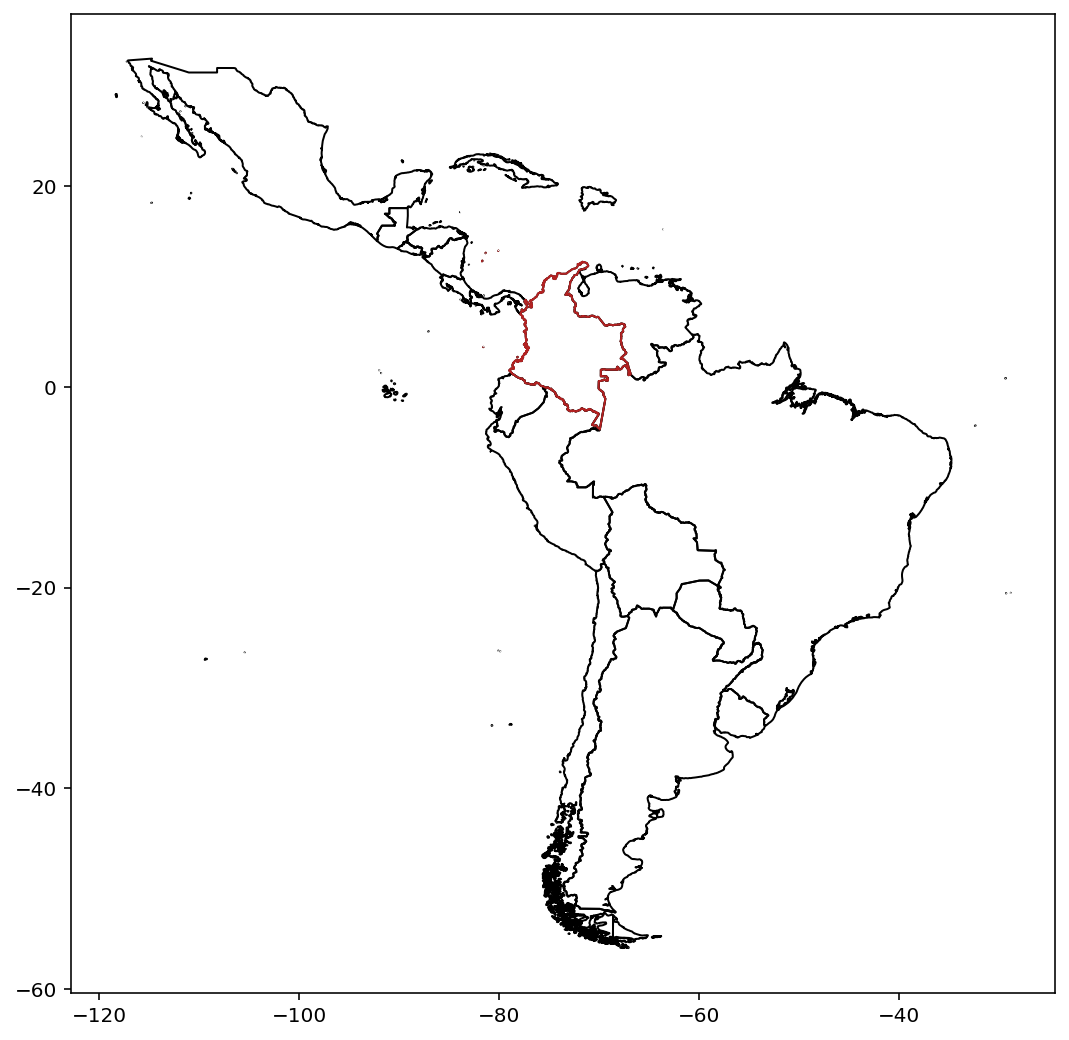

In [15]:
# Immunisation Scheme Distribution (Pie Chart)
country_immunisation_schemes_fig, ax_2 = plt.subplots(figsize = (16, 9)) 
map_df_latam['geometry'].boundary.plot(edgecolor = 'black', linewidth = 1, ax = ax_2)
map_df_latam[map_df_latam['country'] == 'Colombia']['geometry'].boundary.plot(edgecolor = 'firebrick', linewidth = 1, ax = ax_2)
'''
vaccination_df_latam.plot(column = vaccination_df_latam['vaccines'].value_counts(),
              legend = True, 
              legend_kwds = {'bbox_to_anchor': (1, -0.01), 'frameon': True, 'fontsize': label_size = 7},
              ax = ax_2)

ax_2.set_title('Vaccination Scheme in each Country')
ax_2.set_xticks([])
ax_2.set_yticks([])
'''

### 3.4 Total de Vacunas Aplicadas

La gráfica que se presenta a continuación muestra el total de vacunas aplicadas por cada país del DataFrame *vaccination_df_latam*.

In [16]:
# Gráfico de Barras: Total de Vacunas aplicadas por País
total_vaccinations_per_country = vaccination_df_latam['total_vaccinations']
total_vaccinations_fig = px.bar(vaccination_df_latam, 
                        x="country", 
                        y="total_vaccinations", 
                        color='country', 
                        labels={'total_vaccinations':'Total de vacunas aplicadas', 'country':'País'}, 
                        width = 1280,
                        height = 720)
total_vaccinations_fig.update_layout(title_text='Total de vacunas aplicadas por País', title_x=0.5)
total_vaccinations_fig.show()              
total_vaccinations_fig.write_image("total_vaccinations_fig.png") 


### 3.5 Porcentaje de Población Vacunada 

La gráfica que se presenta a continuación muestra el porcentaje de población que han recibido al menos una dosis o que han completado el esquema de inmunización en relación con la población total de cada país del DataFrame *vaccination_df_latam*.

In [23]:
# Pre-procesado de Datos para la Sección 3.5
latam_countries_population = [44.94, 11.51, 211, 18.95, 50.34, 5.048, 10.74, 17.37, 6.454, 16.6, 9.746, 127.6, 4.246, 7.045, 32.51, 3.462, 28.52]
latam_countries_population = [item * 1e6 for item in latam_countries_population]


vaccination_df_latam['people_vaccinated'] = vaccination_df_latam['people_vaccinated'].fillna(0)
vaccination_df_latam['people_fully_vaccinated'] = vaccination_df_latam['people_fully_vaccinated'].fillna(0)

vaccination_df_latam['unavacuna'] = (vaccination_df_latam['people_vaccinated'].fillna(0)/ latam_countries_population)* 100
vaccination_df_latam['fullvacunados'] = (vaccination_df_latam['people_fully_vaccinated'].fillna(0)/ latam_countries_population)* 100
population_vaccinated_percentage = (vaccination_df_latam['total_vaccinations']  / latam_countries_population) * 100 

# Gráfico de Barras: Porcentaje de Población Vacunada
population_vaccinated_percentage_fig = go.Figure(data=[
    go.Bar(name='Total vacunas', x=vaccination_df_latam['country'], y=population_vaccinated_percentage, marker_color='#2980b9'),
    go.Bar(name='Una dosis', x=vaccination_df_latam['country'], y=vaccination_df_latam['unavacuna'],text=vaccination_df_latam['unavacuna'], marker_color='#778beb'),
    go.Bar(name='Dos dosis', x=vaccination_df_latam['country'], y=vaccination_df_latam['fullvacunados'], marker_color='#3dc1d3')
    ])
population_vaccinated_percentage_fig.update_layout(barmode='group', width = 1280, height = 720)
population_vaccinated_percentage_fig.update_layout(title_text="Porcentaje de Población Inmunizada por País", title_x=0.5)
population_vaccinated_percentage_fig.show()
population_vaccinated_percentage_fig.write_image("population_vaccinated_percentage_fig.png") 

### 3.6 Total de Vacunas Aplicadas (Semanal)

La gráfica que se presenta a continuación muestra el porcentaje de población vacunada que ha completado el esquema de inmunización en cada país del DataFrame *vaccination_df_latam*.

<ipython-input-24-72fb0674ea71>:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



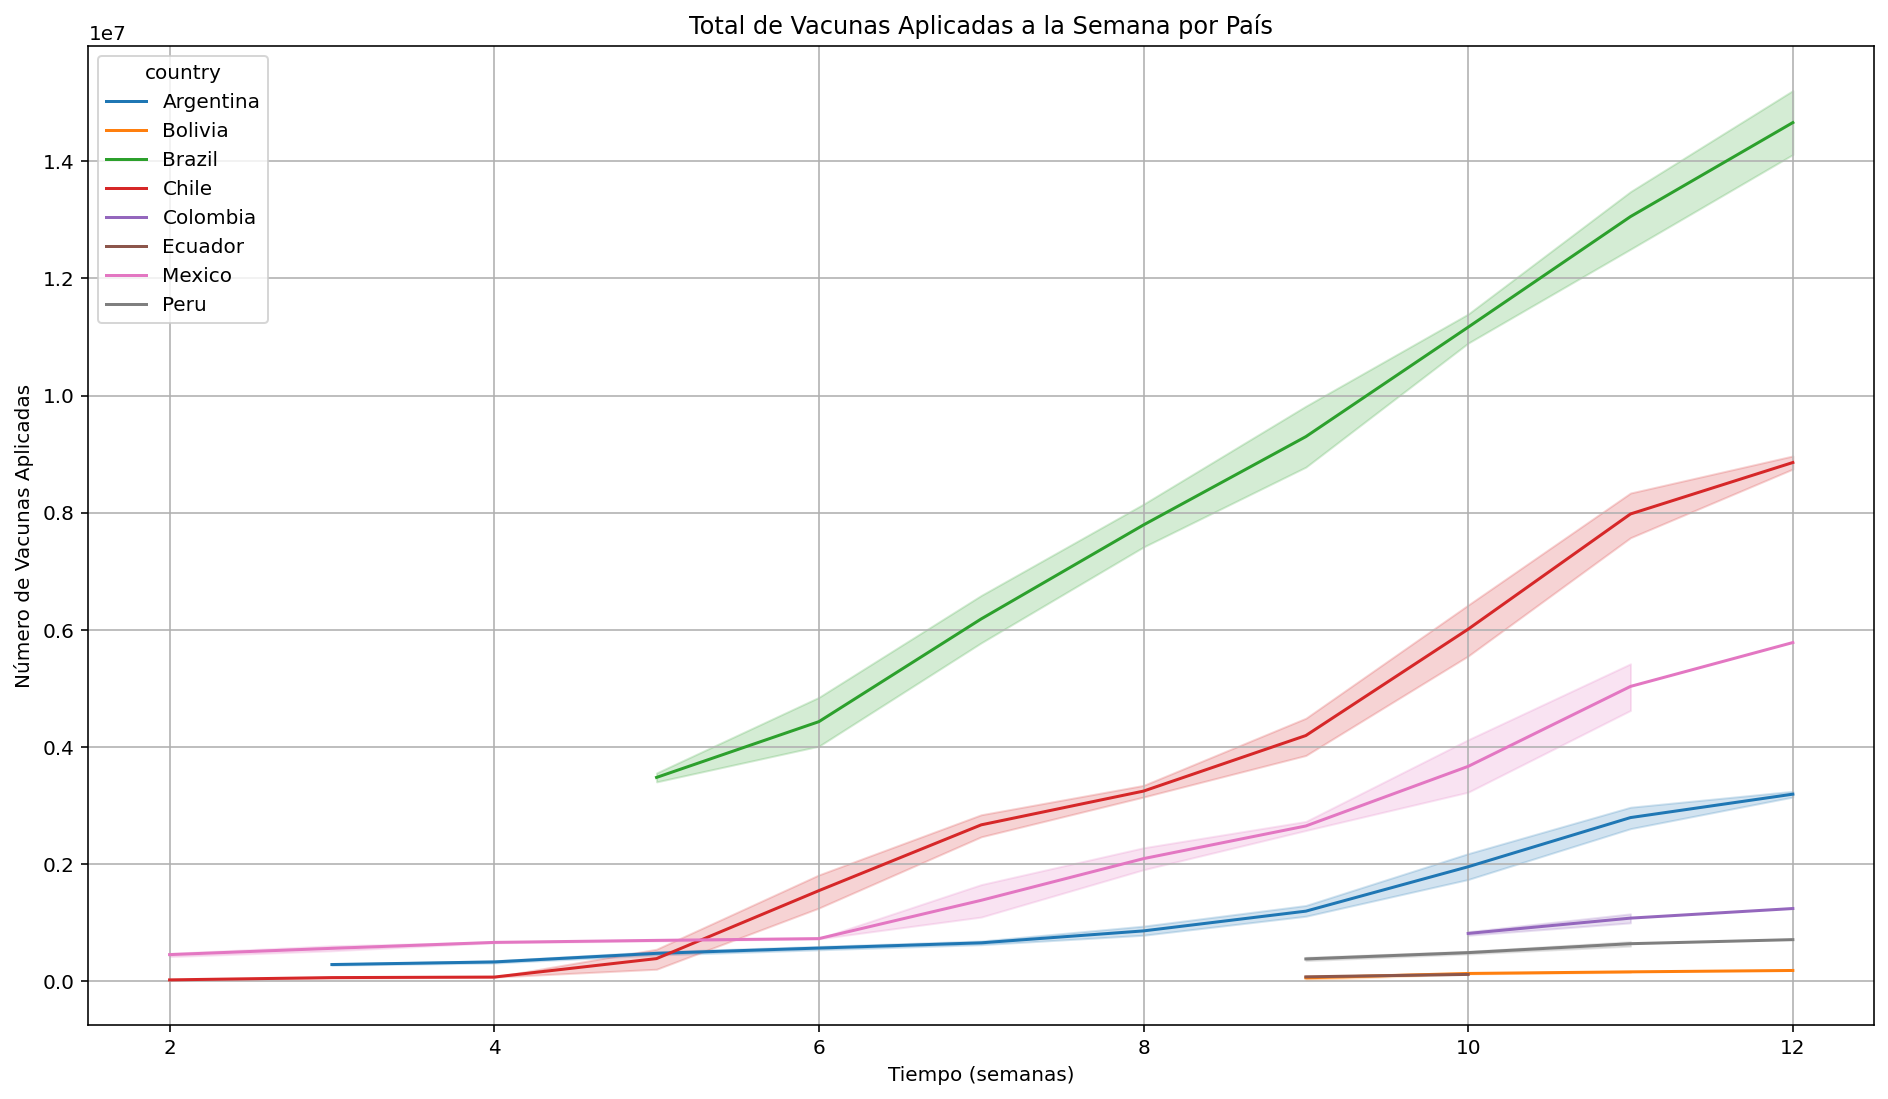

In [24]:
# Gráfico de Líneas: Total de Vacunas Aplicadas a la Semana por País
vaccination_df_latam_copy['week'] = vaccination_df_latam_copy['date'].dt.week

weekly_vaccinations_fig, ax_8 = plt.subplots(figsize=[16,9])
sns.lineplot(data = vaccination_df_latam_copy, x = 'week', y = 'total_vaccinations', hue ='country')
ax_8.set_title('Total de Vacunas Aplicadas a la Semana por País')
ax_8.set_xlabel('Tiempo (semanas)')
ax_8.set_ylabel('Número de Vacunas Aplicadas')
ax_8.grid(True, which='both')
plt.savefig(fname = 'weekly_vaccinations_fig.png',
            dpi=458,
            facecolor='w',
            edgecolor='w',
            orientation='landscape', 
            format='png', 
            transparent=False
            )

### 3.7 Total de Vacunas Diarias Aplicadas por País

La gráfica que se presenta a continuación muestra el porcentaje de población vacunada que ha completado el esquema de inmunización en cada país del DataFrame *vaccination_df_latam*.

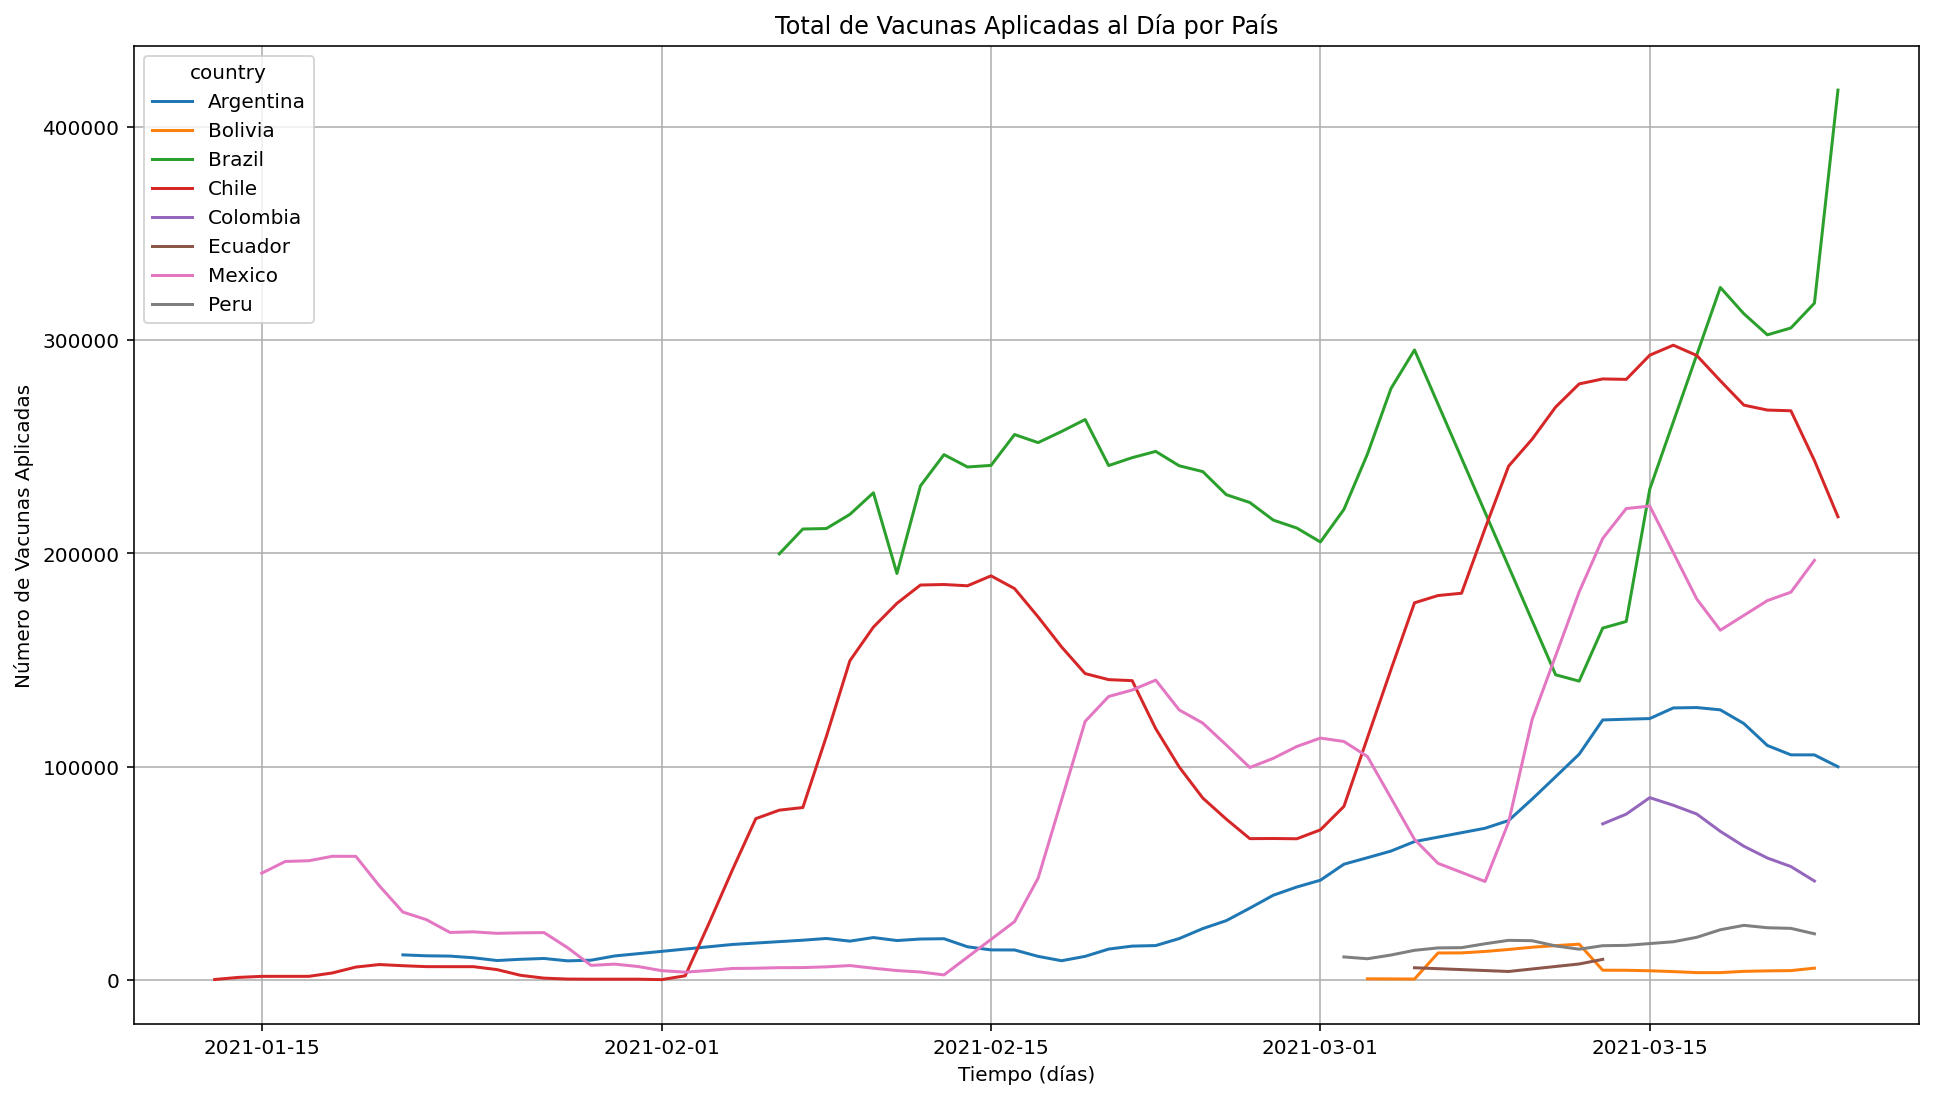

In [25]:
# Gráfico de Líneas: Total de Vacunas Diarias Aplicadas por País

daily_vaccinations_fig, ax_9 = plt.subplots(figsize=[16,9])
sns.lineplot(data = vaccination_df_latam_copy, x = 'date', y = 'daily_vaccinations', hue ='country')
ax_9.set_title('Total de Vacunas Aplicadas al Día por País')
ax_9.set_xlabel('Tiempo (días)')
ax_9.set_ylabel('Número de Vacunas Aplicadas')
ax_9.grid(True, which='both')
plt.savefig(fname = 'daily_vaccinations_fig.png',
            dpi=458, 
            facecolor='w', 
            edgecolor='w', 
            orientation='landscape', 
            format='png', 
            transparent=False
            )

## **4. Conclusiones**
---

- A través de una serie de visualizaciones simples y de análisis de estadística descriptiva, pudimos comparar a Colombia con el resto de Latinoamérica en cuanto a su progreso en las vacunas contra COVID-19. En resumen, podemos decir que Colombia está bastante por detrás de otros países de la región como Chile. Esta afirmación se basa en los siguientes hechos:

    - Fue el décimo país de Latinoamérica en iniciar el proceso de vacunación.
    - En Colombia, alrededor de 1.4 millones de personas (2.4% de la población) han recibido la primera dosis de la vacuna. En comparación, Chile ha vacunado a 4.78 millones (33.66%), mientras que Brasil, uno de los países que más ha sufrido la pandemia, ha vacunado a 8,76 millones (1.91%).
    - Únicamente ha logrado una alta tasa de vacunaciones diarias por encima de cien mil en dos ocasiones, mientras que los dos países nombrados anteriormente constantemente están por encima de esta cifra. 

- Es importante considerar el hecho de que no todos los países comenzaron a vacunar al mismo tiempo. Por ejemplo, Chile comenzó su proceso de vacunación un mes antes que Colombia. Para ello, se muestra la gráfica de las Secciónes [3.6](3.6) y [3.7](3.7), con el objetivo de visualizar cómo ha ido evolucionado el proceso de vacunación desde el principio. Sin embargo, en lugar de usar fechas (D/M/A), usaremos los días y las semanas desde la primera vacunación como variable independiente. De esta forma, todos los países se ubicarán en el mismo punto de partida.

- Hay algunos indicios de que tener una población más pequeña puede ayudar a un país al acelerar las vacunaciones diarias y, por lo tanto, el porcentaje de personas vacunadas (como Costa Rica).


## **5. Video de Presentación**
---

A continuación se muestra el video de presentación correspondiente del proyecto.

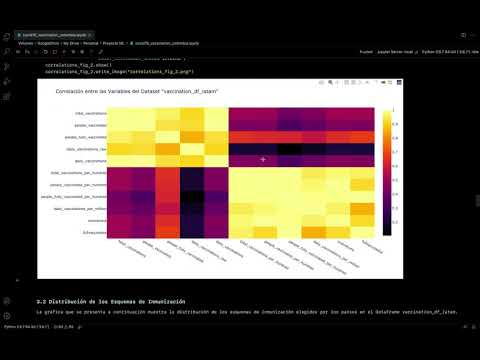

In [ ]:
# Play YouTube Video
YouTubeVideo(id='YmEIjN_3GXA',width=1280,height=720)